In [1]:
# TensorFlow and keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Loads array of train axial 0000.npy
axial0000 = np.load(r'C:/Users/bliu0/Downloads/MRnet-v1.0/train/axial/0000.npy')

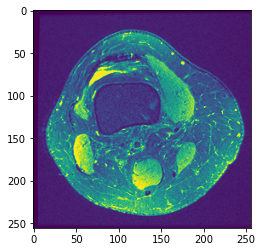

In [3]:
# Visualize np array, axial 0000
imgplot = plt.imshow(axial0000[9])

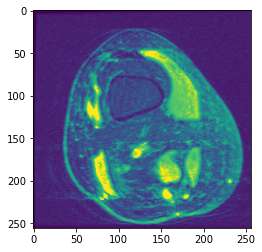

In [4]:
# Visualize axial 1152 array
imgplot1 = plt.imshow(np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/axial/1152.npy')[0])

In [5]:
# LOADING DATA
train_data = []
test_data = []

In [6]:
for x in os.listdir(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/axial/'):
    try:
        train_data.append([np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/axial/'+x)[0]/255,
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/coronal/'+x)[0]/255,
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train/sagittal/'+x)[0]/255])
    except:
        print(x)
for x in os.listdir(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/axial/'):
    try:
        test_data.append([np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/axial/'+x)[0]/255,
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/coronal/'+x)[0]/255,
                          np.load(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid/sagittal/'+x)[0]/255])
    except:
        print(x)

.DS_Store


In [7]:
np.array(train_data).shape

(1130, 3, 256, 256)

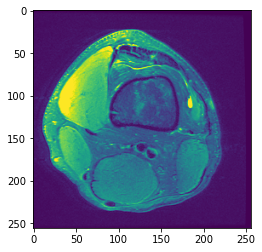

In [8]:
plt.imshow(train_data[5][0])

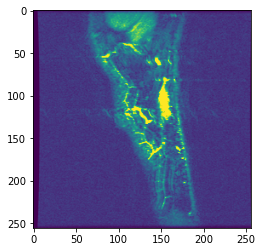

In [9]:
image = plt.imshow(train_data[1][2])

In [10]:
# LOADING LABELS FROM CSV
train_ab_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-abnormal.csv', index_col=0)
train_acl_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-acl.csv', index_col=0)
train_meni_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/train-meniscus.csv', index_col=0)
test_ab_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-abnormal.csv', index_col=0)
test_acl_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-acl.csv', index_col=0)
test_meni_csv = pd.read_csv(r'C:/Users/bliu0/Downloads/MRNet-v1.0/valid-meniscus.csv', index_col=0)

In [11]:
train_labels = [[1,0,0]]
test_labels = [[0,0,0]]

In [12]:
for x in range(1129):
  train_labels.append([tf.squeeze(train_ab_csv.values).numpy()[x], tf.squeeze(train_acl_csv.values).numpy()[x], tf.squeeze(train_meni_csv.values).numpy()[x]])
for x in range(119):
  test_labels.append([tf.squeeze(test_ab_csv.values).numpy()[x], tf.squeeze(test_acl_csv.values).numpy()[x], tf.squeeze(test_meni_csv.values).numpy()[x]])

In [13]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [14]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [15]:
train_data.shape,train_labels.shape

((1130, 3, 256, 256), (1130, 3))

In [16]:
train_data

array([[[[0.        , 0.        , 0.        , ..., 0.01960784,
          0.01568627, 0.01176471],
         [0.        , 0.        , 0.        , ..., 0.03137255,
          0.02352941, 0.03137255],
         [0.        , 0.        , 0.        , ..., 0.05490196,
          0.04313725, 0.04313725],
         ...,
         [0.        , 0.        , 0.        , ..., 0.0627451 ,
          0.05882353, 0.04705882],
         [0.        , 0.        , 0.        , ..., 0.04705882,
          0.05098039, 0.04705882],
         [0.        , 0.        , 0.        , ..., 0.04313725,
          0.02745098, 0.03529412]],

        [[0.        , 0.        , 0.        , ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.        , 0.        , 0.        , ..., 0.00392157,
          0.00392157, 0.00392157],
         [0.        , 0.        , 0.        , ..., 0.00784314,
          0.00392157, 0.00784314],
         ...,
         [0.        , 0.        , 0.        , ..., 0.00784314,
          0.00784314, 0.0

In [17]:
test_labels.shape

(120, 3)

In [18]:
test_labels

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1,

In [19]:
examssadas = []

In [20]:
import pickle
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch

# directory where the volumetric data is located
volumetric_data_dir = 'C:/Users/bliu0/Downloads/otherkneemridataset'

# path to metadata csv file
metadata_csv_path = 'C:/Users/bliu0/Downloads/metadata.csv'

# names=True loads the interprets the first row of csv file as column names
# 'i4' = 4 byte signed integer, 'U20' = unicode max 20 char string
metadata = np.genfromtxt(metadata_csv_path, delimiter=',', names=True, 
    dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20') 

print('Column names:')
print(metadata.dtype.names)

# Select all rows where examID == 502889
exams = metadata


for exam in exams:
    vol_data_file = exam['volumeFilename']
    print(exam['volumeFilename'])

    vol_data_path = os.path.join(volumetric_data_dir, vol_data_file)

    # Load data from file
    with open(vol_data_path, 'rb') as file_handler: # Must use 'rb' as the data is binary
        volumetric_data = pickle.load(file_handler)
        
    examssadas.append([])
    
    for x in volumetric_data:
        x = tf.constant(x)
        image = x[tf.newaxis, ..., tf.newaxis]
        image.shape.as_list()  # [batch, height, width, channels]
        new = tf.image.resize(image, [256,256])[0,...,0].numpy()
        examssadas[-1].append(new/4095)
    
    print('\nShape of volume "%s":' % vol_data_path, volumetric_data.shape)
    
    # Get all roi slices from volume
    z_start = exam['roiZ']
    depth = exam['roiDepth']

Column names:
('examId', 'seriesNo', 'aclDiagnosis', 'kneeLR', 'roiX', 'roiY', 'roiZ', 'roiHeight', 'roiWidth', 'roiDepth', 'volumeFilename')
329637-8.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\329637-8.pck": (32, 320, 320)
390116-9.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\390116-9.pck": (25, 320, 320)
404663-8.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\404663-8.pck": (33, 320, 320)
406320-9.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\406320-9.pck": (29, 320, 320)
412857-8.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\412857-8.pck": (32, 320, 320)
412865-8.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\412865-8.pck": (27, 320, 320)
415102-9.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\415102-9.pck": (22, 320, 320)
425707-8.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\425707-8.pck": (27, 320, 320)
425713-8.p


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\491596-5.pck": (26, 320, 320)
492730-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\492730-6.pck": (30, 320, 320)
492792-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\492792-5.pck": (27, 320, 320)
494291-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\494291-5.pck": (30, 320, 320)
494338-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\494338-5.pck": (30, 320, 320)
494350-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\494350-5.pck": (25, 320, 320)
494353-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\494353-5.pck": (30, 320, 320)
496489-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\496489-5.pck": (27, 320, 320)
496580-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\496580-5.pck": (23, 320, 320)
496621-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\547373-5.pck": (32, 320, 320)
547393-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\547393-5.pck": (32, 320, 320)
547422-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\547422-5.pck": (32, 320, 320)
547450-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\547450-5.pck": (32, 320, 320)
547519-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\547519-5.pck": (31, 320, 320)
549163-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\549163-5.pck": (30, 320, 320)
549844-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\549844-5.pck": (30, 320, 320)
549879-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\549879-5.pck": (30, 320, 320)
549888-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\549888-5.pck": (28, 320, 320)
549897-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\584179-5.pck": (30, 320, 320)
584196-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\584196-5.pck": (30, 320, 320)
584216-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\584216-5.pck": (28, 320, 320)
584216-8.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\584216-8.pck": (28, 320, 320)
584216-9.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\584216-9.pck": (28, 320, 308)
584916-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\584916-6.pck": (24, 320, 320)
585526-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\585526-5.pck": (30, 320, 320)
587683-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\587683-5.pck": (28, 320, 320)
587708-8.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\587708-8.pck": (30, 320, 320)
587739-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\630135-5.pck": (34, 320, 320)
630633-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\630633-5.pck": (30, 320, 320)
630664-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\630664-6.pck": (30, 320, 320)
630685-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\630685-5.pck": (30, 320, 320)
630694-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\630694-5.pck": (30, 320, 320)
632579-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\632579-5.pck": (26, 320, 320)
633387-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\633387-5.pck": (30, 320, 320)
633759-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\633759-5.pck": (30, 320, 320)
633927-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\633927-5.pck": (32, 320, 320)
634187-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\703130-5.pck": (31, 320, 320)
703798-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\703798-5.pck": (30, 320, 320)
704348-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\704348-5.pck": (30, 320, 320)
704469-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\704469-5.pck": (30, 320, 320)
705080-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\705080-5.pck": (30, 320, 320)
705114-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\705114-5.pck": (30, 320, 320)
705138-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\705138-5.pck": (33, 320, 320)
705666-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\705666-5.pck": (30, 320, 320)
706967-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\706967-5.pck": (32, 320, 320)
707171-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\762582-6.pck": (30, 320, 320)
763294-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\763294-6.pck": (25, 320, 320)
763299-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\763299-5.pck": (32, 320, 320)
764536-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\764536-5.pck": (30, 320, 320)
764603-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\764603-5.pck": (30, 320, 320)
765512-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\765512-5.pck": (30, 320, 320)
766154-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\766154-5.pck": (32, 320, 320)
766193-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\766193-5.pck": (33, 320, 320)
766315-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\766315-5.pck": (32, 320, 320)
766889-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\809032-5.pck": (32, 320, 320)
811641-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\811641-5.pck": (30, 320, 320)
813960-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\813960-5.pck": (45, 320, 320)
813983-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\813983-5.pck": (30, 320, 320)
813989-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\813989-5.pck": (30, 320, 320)
814006-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\814006-5.pck": (30, 320, 320)
814313-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\814313-5.pck": (31, 320, 320)
814634-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\814634-5.pck": (35, 320, 320)
815949-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\815949-5.pck": (32, 320, 320)
815981-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\863766-5.pck": (32, 320, 320)
864453-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\864453-5.pck": (32, 320, 320)
865914-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\865914-5.pck": (35, 320, 320)
865989-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\865989-6.pck": (30, 320, 320)
866308-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\866308-5.pck": (32, 320, 320)
867362-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\867362-5.pck": (29, 320, 320)
869584-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\869584-5.pck": (32, 320, 320)
870978-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\870978-5.pck": (32, 320, 320)
871117-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\871117-5.pck": (30, 320, 300)
872088-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\917810-5.pck": (32, 320, 320)
919157-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\919157-5.pck": (32, 320, 320)
919181-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\919181-6.pck": (32, 320, 320)
919194-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\919194-5.pck": (32, 320, 320)
919200-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\919200-6.pck": (32, 320, 320)
919210-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\919210-5.pck": (33, 320, 320)
919218-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\919218-5.pck": (32, 320, 320)
919772-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\919772-5.pck": (32, 320, 320)
919776-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\919776-5.pck": (32, 320, 320)
919778-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\963545-5.pck": (32, 320, 320)
964580-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\964580-5.pck": (32, 320, 320)
964652-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\964652-5.pck": (30, 320, 320)
967475-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\967475-5.pck": (28, 320, 320)
967499-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\967499-5.pck": (26, 320, 320)
967529-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\967529-5.pck": (32, 320, 320)
967556-7.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\967556-7.pck": (28, 320, 320)
967579-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\967579-5.pck": (32, 320, 320)
969135-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\969135-5.pck": (32, 320, 320)
970147-5.pck

Shape of volume "C:/Users/bliu0/Downloads/oth


Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1010675-5.pck": (35, 320, 320)
1013324-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1013324-5.pck": (35, 320, 320)
1013391-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1013391-5.pck": (32, 320, 320)
1013460-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1013460-5.pck": (32, 320, 320)
1013500-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1013500-6.pck": (30, 320, 320)
1016062-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1016062-5.pck": (36, 320, 320)
1016187-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1016187-5.pck": (32, 320, 320)
1016203-6.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1016203-6.pck": (32, 320, 320)
1016907-5.pck

Shape of volume "C:/Users/bliu0/Downloads/otherkneemridataset\1016907-5.pck": (32, 320, 320)
1018997-5.pck

Shape of volume "C:/Users/b

In [21]:
validation_data = []

In [22]:
for x in range(917):
    validation_data.append([examssadas[x][round(len(examssadas[x])/2)],examssadas[x][round(len(examssadas[x])/2)],examssadas[x][round(len(examssadas[x])/2)]])

In [23]:
validation_data = np.array(validation_data)
validation_data.shape

(917, 3, 256, 256)

In [24]:
validation_labels = []

In [25]:
for exam in exams:
    if exam['aclDiagnosis'] >= 1:
        validation_labels.append([0,1,0])
    elif exam['aclDiagnosis'] == 0:
        validation_labels.append([0,0,0])
    else:
        print(exam['aclDiagnosis'])

In [26]:
validation_labels = np.array(validation_labels)

In [27]:
validation_labels.shape

(917, 3)

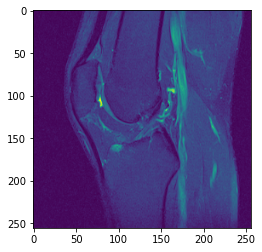

In [28]:
img = plt.imshow(validation_data[916][0])

# Model

In [39]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(3,256,256)),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(750,activation="relu"),
                             tf.keras.layers.Dense(3,activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.003),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,train_labels,epochs=5)

Epoch 1/5
36/36 [==============================] - 16s 435ms/step - loss: 13.6257 - accuracy: 0.9389
Epoch 2/5
36/36 [==============================] - 16s 434ms/step - loss: 0.5391 - accuracy: 1.0000
Epoch 3/5
36/36 [==============================] - 16s 441ms/step - loss: 0.5135 - accuracy: 1.0000
Epoch 4/5
36/36 [==============================] - 16s 434ms/step - loss: 0.4899 - accuracy: 1.0000
Epoch 5/5
36/36 [==============================] - 16s 437ms/step - loss: 0.4632 - accuracy: 1.0000


In [40]:
model.evaluate(test_data,test_labels)

4/4 [==============================] - 0s 52ms/step - loss: 0.6347 - accuracy: 1.0000


[0.6347070932388306, 1.0]

In [41]:
model.predict(test_data)

array([[0.63832164, 0.12557158, 0.20820051],
       [0.6368934 , 0.1193122 , 0.20201975],
       [0.79781294, 0.25222963, 0.44680768],
       [0.46922117, 0.0388979 , 0.078989  ],
       [0.9671502 , 0.14626554, 0.5445879 ],
       [0.95236266, 0.36637247, 0.6588    ],
       [0.79432595, 0.09250259, 0.23646334],
       [0.9187166 , 0.2299506 , 0.52795744],
       [0.5850347 , 0.10656261, 0.17325485],
       [0.69740164, 0.087082  , 0.18498003],
       [0.9745804 , 0.31825143, 0.6736742 ],
       [0.93305886, 0.38616133, 0.6484922 ],
       [0.90936756, 0.18543491, 0.4885685 ],
       [0.8584583 , 0.25228614, 0.46077198],
       [0.95343924, 0.13709286, 0.5136995 ],
       [0.7802029 , 0.10120571, 0.24823055],
       [0.43268803, 0.07428497, 0.11991572],
       [0.5896795 , 0.11378032, 0.181241  ],
       [0.94219124, 0.19325504, 0.5076345 ],
       [0.50936705, 0.2736566 , 0.28467697],
       [0.851781  , 0.13499045, 0.35009846],
       [0.9710041 , 0.06972045, 0.40288386],
       [0.

In [42]:
test_labels

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1,

In [43]:
model.evaluate(validation_data,validation_labels)

29/29 [==============================] - 2s 82ms/step - loss: 0.8339 - accuracy: 0.7525


[0.8338981866836548, 0.752453625202179]